A. Comparing Logistic Regression, Random Forest, Support Vector Machines and XGBoost models
-------------------------------------------------------------------------------------------

In [242]:
#libraries
# Data Processing
import pandas as pd
import numpy as np

# metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_validate

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

1a. Loading Y test, Y predict and performance metrics for Logistic Regression

In [243]:
LR_y_test = pd.read_csv('results/LR_Ytest.csv')
LR_y_test = LR_y_test #to use the same class encoding throught

LR_y_pred = pd.read_csv('results/LR_Ypred.csv')
LR_y_pred = LR_y_pred # to use the same class encoding through

LR_y_pred_score = pd.read_csv('results/LR_Y_pred_score.csv')
LR_y_pred_score = LR_y_pred_score.to_numpy()

LR_metrics = pd.read_csv('results/LR_performance_metrics.csv')

LR_perm_import = pd.read_csv('results/LR_Importance.csv')

1b. Loading Y test, Y predict and performance metrics for Random Forest

In [244]:
RF_y_test = pd.read_csv('results/RF_Ytest.csv')
RF_y_pred = pd.read_csv('results/RF_Ypred.csv')
RF_y_pred_score = pd.read_csv('results/RF_Y_pred_score.csv')
RF_y_pred_score = RF_y_pred_score.to_numpy()

RF_metrics = pd.read_csv('results/RF_performance_metrics.csv')

RF_gini_import = pd.read_csv('results/RF_Gini_Importance.csv')
RF_perm_import = pd.read_csv('results/RF_Perm_Importance.csv')

1c. Loading Y test, Y predict and performance metrics for Support Vector Machines

In [245]:
SVM_y_test = pd.read_csv('results/SVM_Ytest.csv')
SVM_y_pred = pd.read_csv('results/SVM_Ypred.csv')
SVM_y_pred_score = pd.read_csv('results/SVM_Y_pred_score.csv')
SVM_y_pred_score = SVM_y_pred_score.to_numpy()

SVM_metrics = pd.read_csv('results/SVM_performance_metrics.csv')

SVM_gini_import = pd.read_csv('results/SVM_Gini_Importance.csv')
SVM_perm_import = pd.read_csv('results/SVM_Perm_Importance.csv')

1d. Loading Y test, Y predict and performance metrics for XGBoost

In [246]:
XGBoost_y_test = pd.read_csv('results/XGBoost_Ytest.csv')
XGBoost_y_pred = pd.read_csv('results/XGBoost_Ypred.csv')
XGBoost_y_pred_score = pd.read_csv('results/XGBoost_Y_pred_score.csv')
XGBoost_y_pred_score = XGBoost_y_pred_score.to_numpy()

XGBoost_metrics = pd.read_csv('results/XGBoost_performance_metrics.csv')
XGBoost_perm_import = pd.read_csv('results/XGBoost_Perm_Importance.csv')

2. Side-by-side Confusion Matrices
---------------------------------------------------------

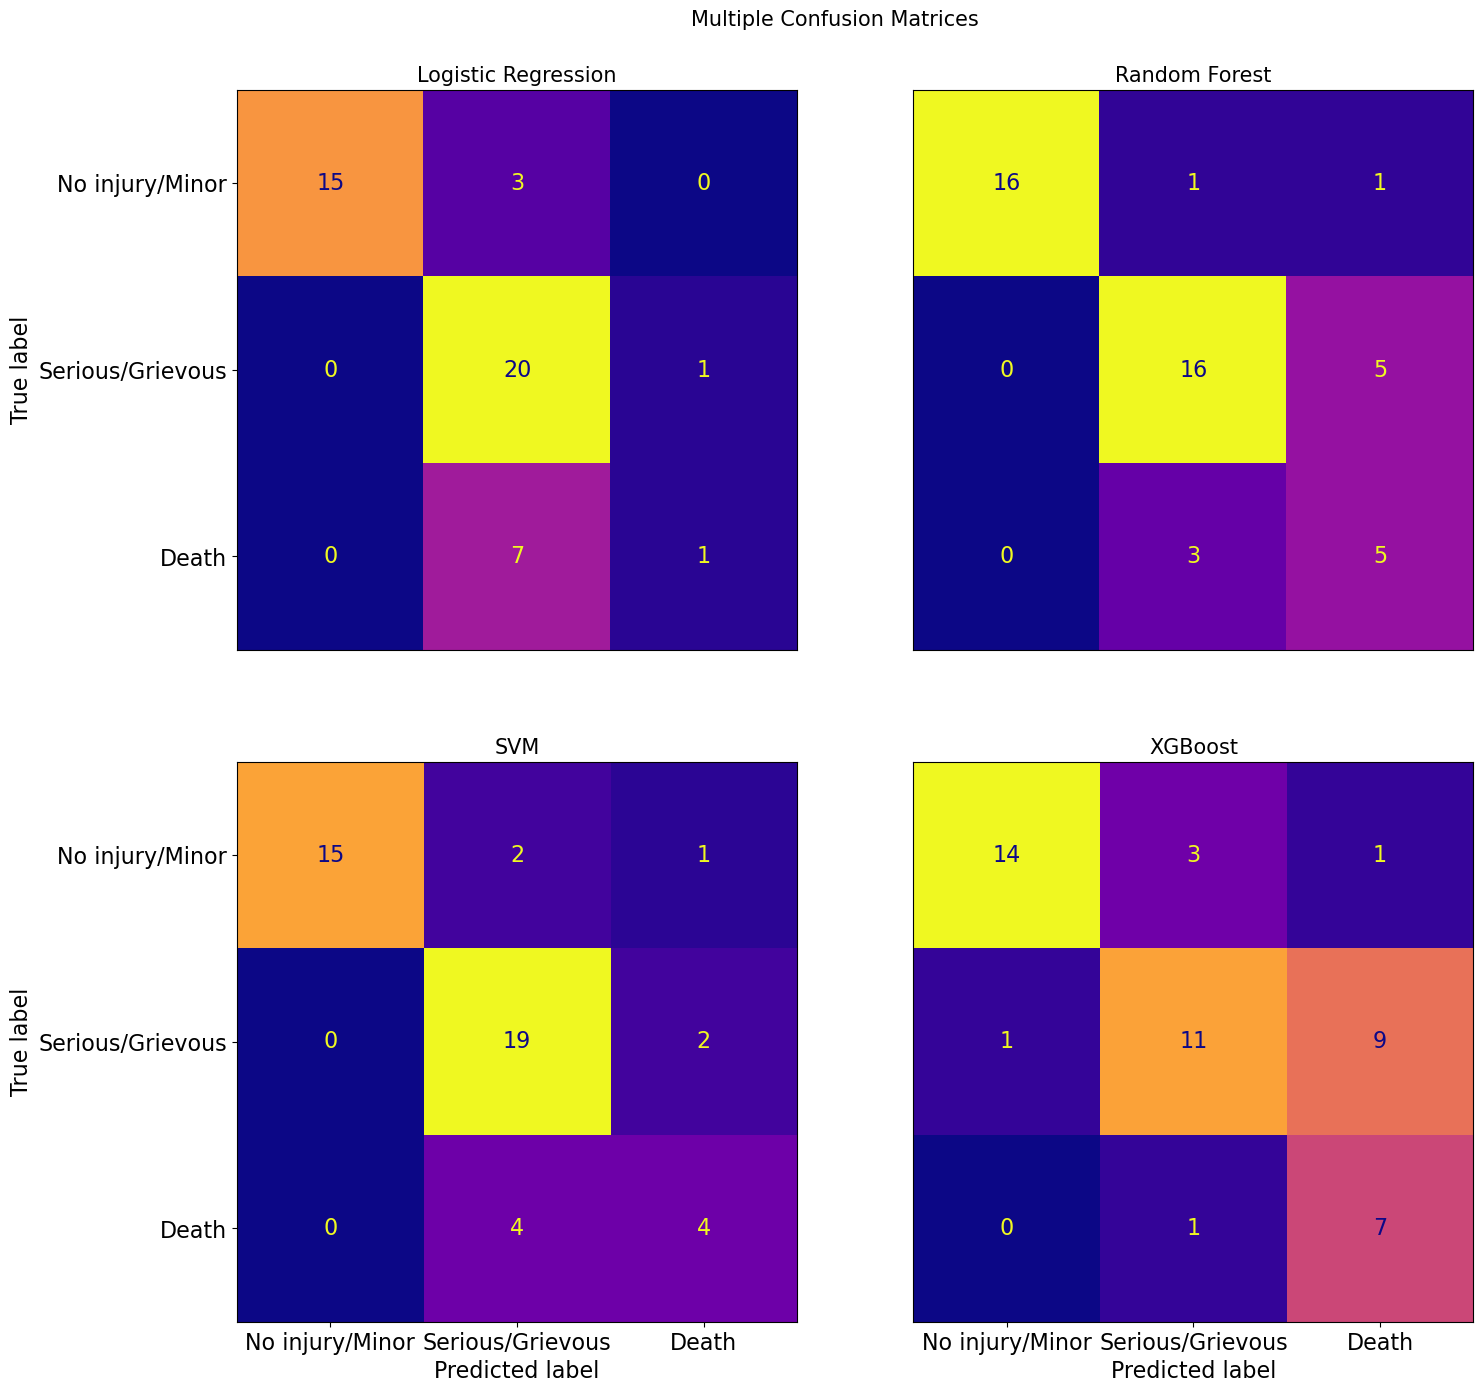

In [247]:
# Set formatting and styling options for the confusion matrices
title_size = 15
plt.rcParams.update({'font.size':16})
display_labels = ['No injury/Minor','Serious/Grievous','Death']
colorbar = False
cmap = "plasma"  


# Create subplots for given confusion matrices
f, axes = plt.subplots(2, 2, figsize=(16, 16))

# Plot the first confusion matrix (Logistic Regression ) at position (0, 0)
RFcm = confusion_matrix(LR_y_test, LR_y_pred)
axes[0, 0].set_title("Logistic Regression", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=RFcm, display_labels=display_labels).plot(
    include_values=True, cmap=cmap, ax=axes[0, 0], colorbar=colorbar)

# Remove x-axis labels and ticks LR
axes[0, 0].xaxis.set_ticklabels(['', '', ''])
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

#------------------------------------------------------------------------------

# Plot the second confusion matrix (Random Forest) at position (0, 1)
RFcm = confusion_matrix(RF_y_test, RF_y_pred)
axes[0, 1].set_title("Random Forest", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=RFcm, display_labels=display_labels).plot(
    include_values=True, cmap=cmap, ax=axes[0, 1], colorbar=colorbar)

# Remove x and y-axis labels and ticks RF
axes[0, 1].xaxis.set_ticklabels(['', '', ''])
axes[0, 1].yaxis.set_ticklabels(['', '', ''])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='both', which='both', bottom=False, left=False)

#------------------------------------------------------------------------------------

# Plot the third confusion matrix (SVM) at position (1, 0)
RFcm = confusion_matrix(SVM_y_test, SVM_y_pred)
axes[1, 0].set_title("SVM", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=RFcm, display_labels=display_labels).plot(
    include_values=True, cmap=cmap, ax=axes[1, 0], colorbar=colorbar)

#--------------------------------------------------------------------------------------

# Plot the fourth confusion matrix (XGBoost) at position (1, 1)
RFcm = confusion_matrix(XGBoost_y_test, XGBoost_y_pred)
axes[1,1].set_title("XGBoost", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=RFcm, display_labels=display_labels).plot(
    include_values=True, cmap=cmap, ax=axes[1, 1], colorbar=colorbar)

# Remove x and y-axis labels and ticks for XGBoost
axes[1, 1].yaxis.set_ticklabels(['', '', ''])
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='y', which='both',left=False)

# Set the figure's suptitle and display the plot
f.suptitle("Multiple Confusion Matrices", size=title_size, y=0.93)

plt.show()

# Save the figure as a PDF file
f.savefig("multiple_confusion_matrices.pdf", bbox_inches='tight')

3. Side-by-side Classification Reports
--------------------------------------------------------------------------------

In [248]:
#Logistic Regression Classification Report
LR_report = classification_report(LR_y_test, LR_y_pred, output_dict=True)
df_LR_report = pd.DataFrame(LR_report).transpose()
df_LR_report.drop(df_LR_report.tail(3).index,inplace=True)
df_LR_report2 = df_LR_report.set_axis(['precision_LR', 'recall_LR', 'f1-score_LR', 'support_LR'], axis=1)
#df_LR_report2 = df_LR_report2.T
print(df_LR_report2)

#Random Forest Classification Report 
RF_report = classification_report(RF_y_test, RF_y_pred, output_dict=True)
df_RF_report = pd.DataFrame(RF_report).transpose()
df_RF_report.drop(df_RF_report.tail(3).index,inplace=True)
df_RF_report2 = df_RF_report.set_axis(['precision_RF', 'recall_RF', 'f1-score_RF', 'support_RF'], axis=1)
#df_RF_report2 = df_RF_report2.T
print(df_RF_report2)

#SVM Classification Report 
SVM_report = classification_report(SVM_y_test, SVM_y_pred, output_dict=True)
df_SVM_report = pd.DataFrame(SVM_report).transpose()
df_SVM_report.drop(df_SVM_report.tail(3).index,inplace=True)
df_SVM_report2 = df_SVM_report.set_axis(['precision_SVM', 'recall_SVM', 'f1-score_SVM', 'support_SVM'], axis=1)
#df_SVM_report2 = df_SVM_report2.T
print(df_SVM_report2)

#XGBoost Classification Report 
XGBoost_report = classification_report(XGBoost_y_test, XGBoost_y_pred, output_dict=True)
df_XGBoost_report = pd.DataFrame(XGBoost_report).transpose()
df_XGBoost_report.drop(df_XGBoost_report.tail(3).index,inplace=True)
df_XGBoost_report2 = df_XGBoost_report.set_axis(['precision_XGBoost', 'recall_XGBoost', 'f1-score_XGBoost', 'support_XGBoost'], axis=1)
#df_SVM_report2 = df_SVM_report2.T
print(df_XGBoost_report2)



   precision_LR  recall_LR  f1-score_LR  support_LR
0      1.000000   0.833333     0.909091        18.0
1      0.666667   0.952381     0.784314        21.0
2      0.500000   0.125000     0.200000         8.0
   precision_RF  recall_RF  f1-score_RF  support_RF
0      1.000000   0.888889     0.941176        18.0
1      0.800000   0.761905     0.780488        21.0
2      0.454545   0.625000     0.526316         8.0
   precision_SVM  recall_SVM  f1-score_SVM  support_SVM
0       1.000000    0.833333      0.909091         18.0
1       0.760000    0.904762      0.826087         21.0
2       0.571429    0.500000      0.533333          8.0
   precision_XGBoost  recall_XGBoost  f1-score_XGBoost  support_XGBoost
0           0.933333        0.777778          0.848485             18.0
1           0.733333        0.523810          0.611111             21.0
2           0.411765        0.875000          0.560000              8.0


In [249]:
precision_combined = pd.DataFrame([df_LR_report2['precision_LR'], df_RF_report2['precision_RF'], df_SVM_report2['precision_SVM'], df_XGBoost_report2['precision_XGBoost']])
recall_combined = pd.DataFrame([df_LR_report2['recall_LR'], df_RF_report2['recall_RF'], df_SVM_report2['recall_SVM'], df_XGBoost_report2['recall_XGBoost']])
f1_score_combined = pd.DataFrame([df_LR_report2['f1-score_LR'], df_RF_report2['f1-score_RF'], df_SVM_report2['f1-score_SVM'], df_XGBoost_report2['f1-score_XGBoost']])

                    
report_combined = pd.concat([precision_combined,recall_combined,f1_score_combined])
report_combined2 = report_combined.set_axis(['Minor/No Injury', 'Serious/Grivous', 'Death'], axis=1)
print(report_combined2)

#report_combined_file = "results/classification_report_combined.csv"
#report_combined2.to_csv(report_combined_file, index=False)

                   Minor/No Injury  Serious/Grivous     Death
precision_LR              1.000000         0.666667  0.500000
precision_RF              1.000000         0.800000  0.454545
precision_SVM             1.000000         0.760000  0.571429
precision_XGBoost         0.933333         0.733333  0.411765
recall_LR                 0.833333         0.952381  0.125000
recall_RF                 0.888889         0.761905  0.625000
recall_SVM                0.833333         0.904762  0.500000
recall_XGBoost            0.777778         0.523810  0.875000
f1-score_LR               0.909091         0.784314  0.200000
f1-score_RF               0.941176         0.780488  0.526316
f1-score_SVM              0.909091         0.826087  0.533333
f1-score_XGBoost          0.848485         0.611111  0.560000


<Axes: >

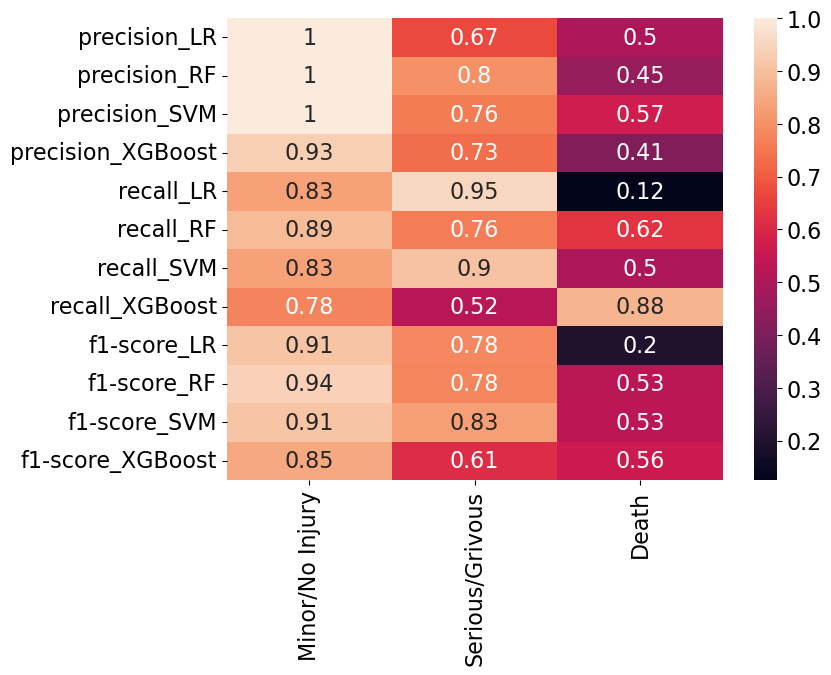

In [250]:
plt.figure(figsize=(8, 6))
sns.heatmap(report_combined2, annot=True)

3. Metrics Compasions
--------------------------------------------------------------------------

In [251]:
#metrics_combined = pd.DataFrame([LR_metrics, RF_metrics['Random_Forest_Metrics_Values'], 
#SVM_metrics['Random_Forest_Metrics_Values'], XGBoost_metrics['Random_Forest_Metrics_Values']])

metrics_combined = pd.concat([LR_metrics['Performance_Metrics:'], round(LR_metrics['LR_Metrics_Values'],2), 
                              round(RF_metrics['Random_Forest_Metrics_Values'],2), round(SVM_metrics['Support_Vector_Machine_Values'],2),
                               round(XGBoost_metrics['XGBoost_Metrics_Values'],2)],  axis = 1)

metrics_combined2 = metrics_combined.rename(columns={'LR_Metrics_Values': 'LR', 'Random_Forest_Metrics_Values': 'RF', 'Support_Vector_Machine_Values': 'SVM',
                                                    'XGBoost_Metrics_Values':'XGBoost'}) 

metrics_combined_file = "results/metrics_combined.csv"
metrics_combined2.to_csv(metrics_combined_file, index=False)
metrics_combined2

,Performance_Metrics:,LR,RF,SVM,XGBoost
0,F1Score,0.73,0.80,0.81,0.69
1,balanced_accuracy,0.64,0.76,0.75,0.73
2,accuracy,0.77,0.79,0.81,0.68
3,mean fit time,NaN,0.14,0.03,0.06


4. Precision/Recall and ROC curves
----------------------------------------------------------------------------------------

In [252]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

# roc curve
LR_fpr = dict() #false positives Logistic Regression
LR_tpr = dict() #true positives Logistic Regression

RF_fpr = dict() #false positives Random Forest
RF_tpr = dict() #true positives Random Forest

SVM_fpr = dict() #false positives SVM
SVM_tpr = dict() #true positives SVM

XGBoost_fpr = dict() #false positives XG Boost
XGBoost_tpr = dict() #true positives XG Boost

#---------------------------------------

LR_roc_auc = dict() #roc_auc_score LR
RF_roc_auc = dict() #roc_auc_score RF
SVM_roc_auc = dict() #roc_auc_score SVM
XGBoost_roc_auc = dict() #roc_auc_score XGBoost

n_classes = len(set(RF_y_test['injury_severity']))

LR_y_test_bin = label_binarize(LR_y_test, classes=[*range(n_classes)])
RF_y_test_bin = label_binarize(RF_y_test, classes=[*range(n_classes)])
SVM_y_test_bin = label_binarize(SVM_y_test, classes=[*range(n_classes)])
XGBoost_y_test_bin = label_binarize(XGBoost_y_test, classes=[*range(n_classes)])

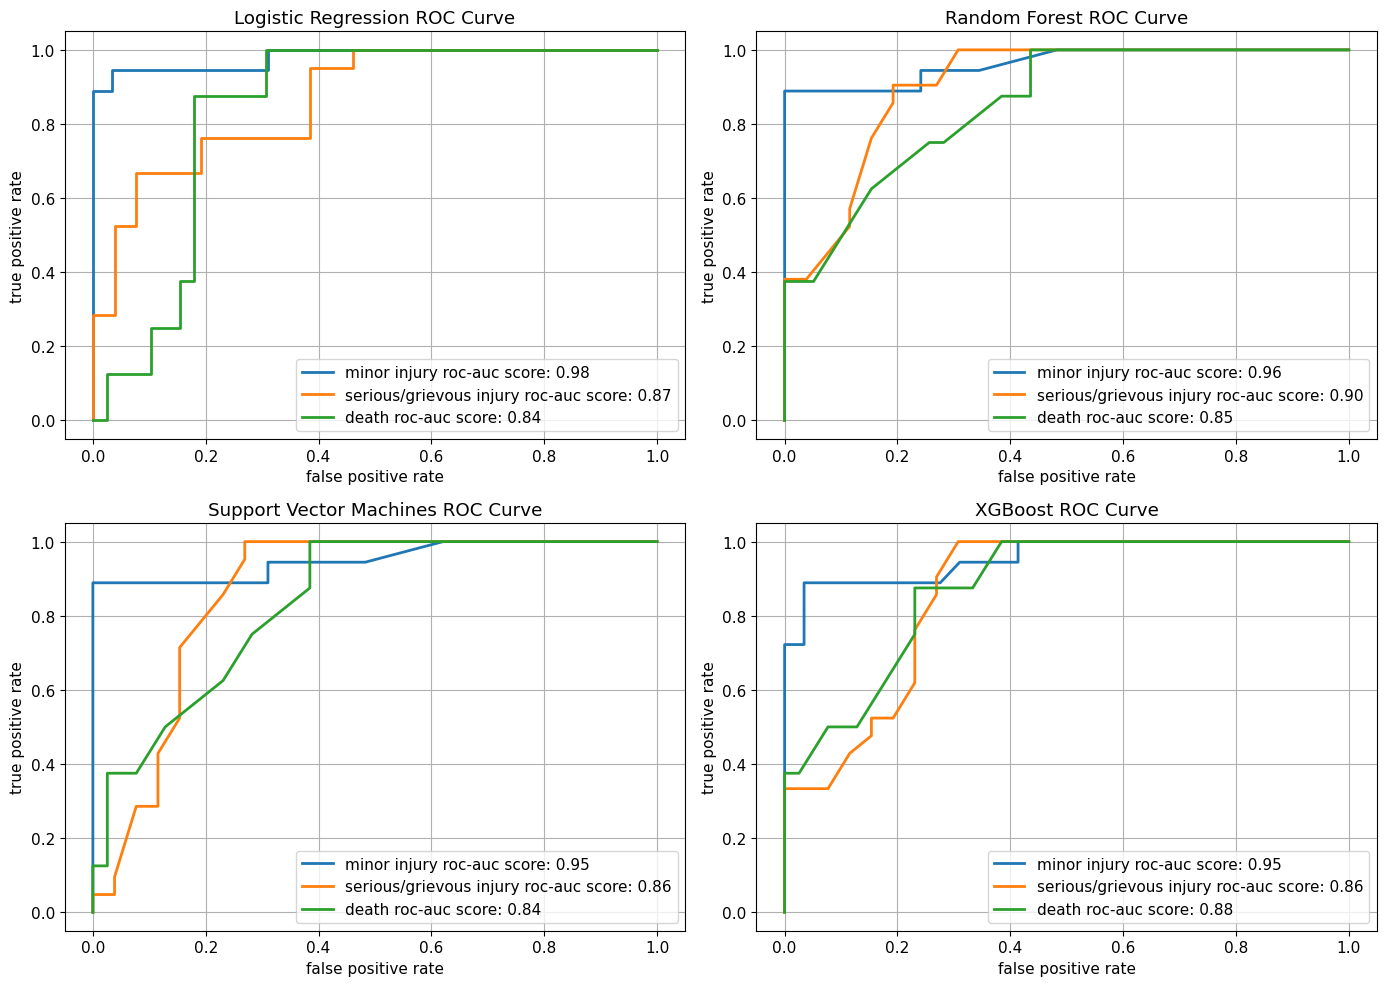

In [253]:
# ROC curves

plt.rcParams.update({'font.size':11})

plt.figure(figsize=(14, 10))
# Plot 1: LR
plt.subplot(2, 2, 1)
for i in range(n_classes):
    LR_fpr[i], LR_tpr[i], _ = roc_curve(LR_y_test_bin[:, i],
                                  LR_y_pred_score[:, i])
    LR_roc_auc[i] = roc_auc_score(LR_y_test_bin[:, i],
                                  LR_y_pred_score[:, i])
    plt.plot(LR_fpr[i], LR_tpr[i], lw=2, label='class {}'.format(i))


plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

label1 = (f"minor injury roc-auc score: {LR_roc_auc[0]:.2f}")
label2 = (f"serious/grievous injury roc-auc score: {LR_roc_auc[1]:.2f}")
label3 = (f"death roc-auc score: {LR_roc_auc[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Logistic Regression ROC Curve")
plt.grid(True)


# Plot 2: Random Forest
plt.subplot(2, 2, 2)

for i in range(n_classes):
    RF_fpr[i], RF_tpr[i], _ = roc_curve(RF_y_test_bin[:, i],
                                  RF_y_pred_score[:, i])
    RF_roc_auc[i] = roc_auc_score(RF_y_test_bin[:, i],
                                  RF_y_pred_score[:, i])
    plt.plot(RF_fpr[i], RF_tpr[i], lw=2, label='class {}'.format(i))


plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

label1 = (f"minor injury roc-auc score: {RF_roc_auc[0]:.2f}")
label2 = (f"serious/grievous injury roc-auc score: {RF_roc_auc[1]:.2f}")
label3 = (f"death roc-auc score: {RF_roc_auc[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Random Forest ROC Curve")
plt.grid(True)



# Plot 3: SVM
plt.subplot(2, 2, 3)

for i in range(n_classes):
    SVM_fpr[i], SVM_tpr[i], _ = roc_curve(SVM_y_test_bin[:, i],
                                  SVM_y_pred_score[:, i])
    SVM_roc_auc[i] = roc_auc_score(SVM_y_test_bin[:, i],
                                  SVM_y_pred_score[:, i])
    plt.plot(SVM_fpr[i], SVM_tpr[i], lw=2, label='class {}'.format(i))


plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

label1 = (f"minor injury roc-auc score: {SVM_roc_auc[0]:.2f}")
label2 = (f"serious/grievous injury roc-auc score: {SVM_roc_auc[1]:.2f}")
label3 = (f"death roc-auc score: {SVM_roc_auc[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Support Vector Machines ROC Curve")
plt.grid(True)


# Plot 4: XGBoost
plt.subplot(2, 2, 4)

for i in range(n_classes):
    XGBoost_fpr[i], XGBoost_tpr[i], _ = roc_curve(XGBoost_y_test_bin[:, i],
                                  XGBoost_y_pred_score[:, i])
    XGBoost_roc_auc[i] = roc_auc_score(XGBoost_y_test_bin[:, i],
                                  XGBoost_y_pred_score[:, i])
    plt.plot(XGBoost_fpr[i], XGBoost_tpr[i], lw=2, label='class {}'.format(i))


plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

label1 = (f"minor injury roc-auc score: {XGBoost_roc_auc[0]:.2f}")
label2 = (f"serious/grievous injury roc-auc score: {XGBoost_roc_auc[1]:.2f}")
label3 = (f"death roc-auc score: {XGBoost_roc_auc[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("XGBoost ROC Curve")
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In the case of a well-performing model, the true positive rates shoots up close to 1 almost immediately and then moves on horizontally.

All of the models have the highest rates of true positives for minor/non-injury category and the lowest rate of true positives for the death target category, except XGBoost, which showcases a higher rate of true positives for death category, compared to serious/grievous injuries.

In [254]:
#precision/recall curves

LR_precision = dict()
LR_recall = dict()
LR_rp_auc_score = dict() #pr_auc score

RF_precision = dict()
RF_recall = dict()
RF_rp_auc_score = dict() #pr_auc score

SVM_precision = dict()
SVM_recall = dict()
SVM_rp_auc_score = dict() #pr_auc score

XGBoost_precision = dict()
XGBoost_recall = dict()
XGBoost_rp_auc_score = dict() #pr_auc score


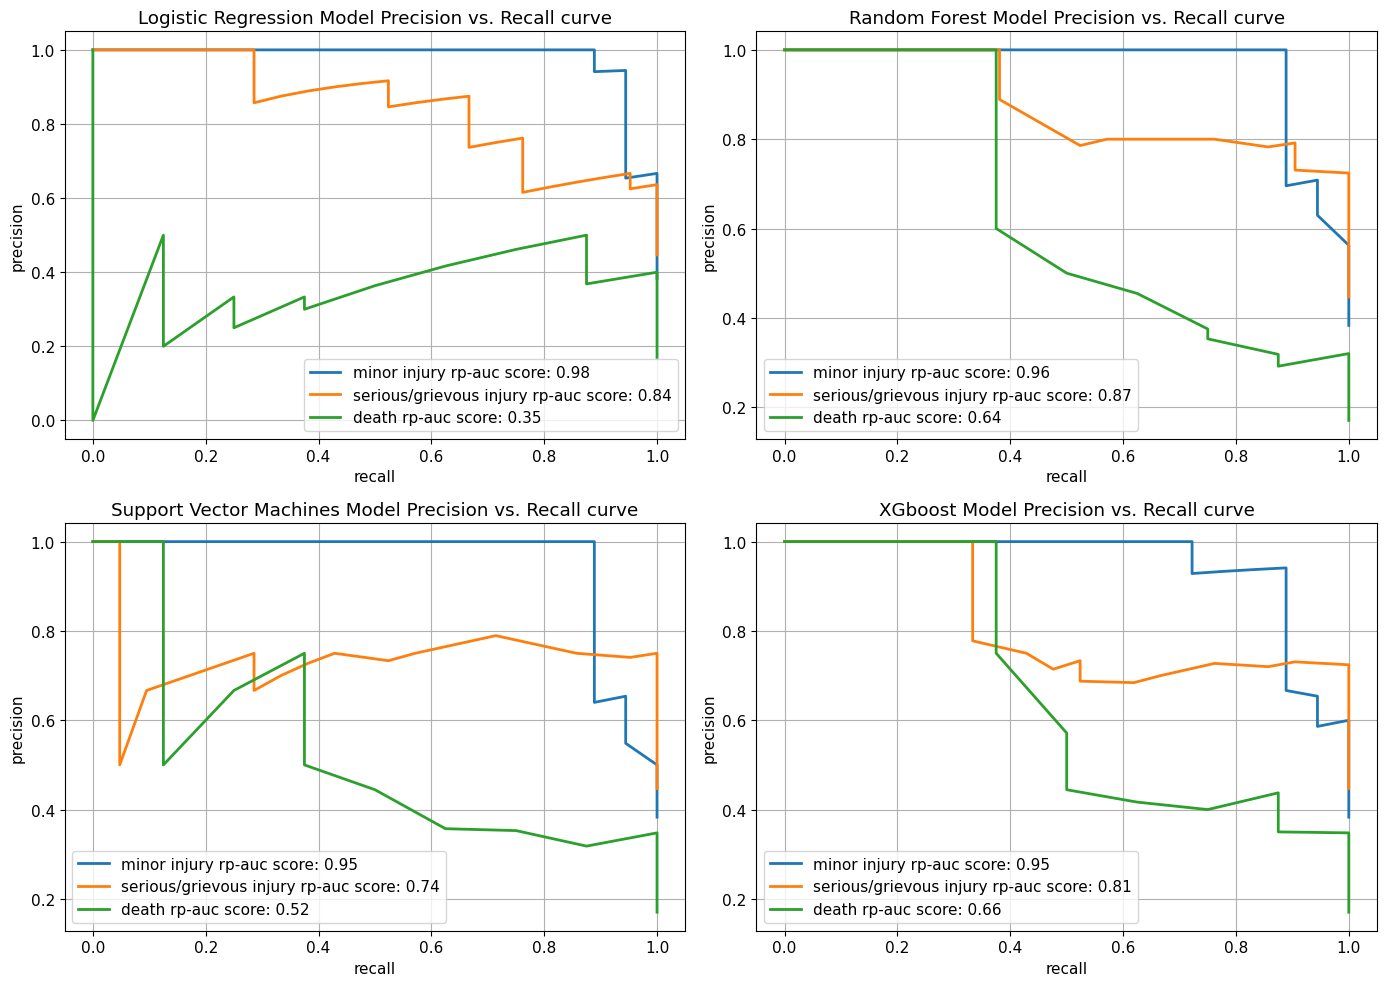

In [255]:
#precision/recall curves

plt.rcParams.update({'font.size':11})

plt.figure(figsize=(14, 10))

# Plot 1: Logistic Regression
plt.subplot(2, 2, 1)
for i in range(n_classes):
    LR_precision[i], LR_recall[i],_ = precision_recall_curve(LR_y_test_bin[:, i],
                                                        LR_y_pred_score[:,i])
    LR_rp_auc_score[i] = auc(LR_recall[i],LR_precision[i])
    plt.plot(LR_recall[i], LR_precision[i], lw=2, label='class {}'.format(i))


plt.xlabel("recall")
plt.ylabel("precision")

label1 = (f"minor injury rp-auc score: {LR_rp_auc_score[0]:.2f}")
label2 = (f"serious/grievous injury rp-auc score: {LR_rp_auc_score[1]:.2f}")
label3 = (f"death rp-auc score: {LR_rp_auc_score[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Logistic Regression Model Precision vs. Recall curve")
plt.grid(True)


# Plot 2: Random Forest
plt.subplot(2, 2, 2)
for i in range(n_classes):
    RF_precision[i], RF_recall[i],_ = precision_recall_curve(RF_y_test_bin[:, i],
                                                        RF_y_pred_score[:,i])
    RF_rp_auc_score[i] = auc(RF_recall[i],RF_precision[i])
    plt.plot(RF_recall[i], RF_precision[i], lw=2, label='class {}'.format(i))


plt.xlabel("recall")
plt.ylabel("precision")

label1 = (f"minor injury rp-auc score: {RF_rp_auc_score[0]:.2f}")
label2 = (f"serious/grievous injury rp-auc score: {RF_rp_auc_score[1]:.2f}")
label3 = (f"death rp-auc score: {RF_rp_auc_score[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Random Forest Model Precision vs. Recall curve")
plt.grid(True)



# Plot 3: SVM
plt.subplot(2, 2, 3)

for i in range(n_classes):
    SVM_precision[i], SVM_recall[i],_ = precision_recall_curve(SVM_y_test_bin[:, i],
                                                        SVM_y_pred_score[:,i])
    SVM_rp_auc_score[i] = auc(SVM_recall[i],SVM_precision[i])
    plt.plot(SVM_recall[i], SVM_precision[i], lw=2, label='class {}'.format(i))


plt.xlabel("recall")
plt.ylabel("precision")

label1 = (f"minor injury rp-auc score: {SVM_rp_auc_score[0]:.2f}")
label2 = (f"serious/grievous injury rp-auc score: {SVM_rp_auc_score[1]:.2f}")
label3 = (f"death rp-auc score: {SVM_rp_auc_score[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Support Vector Machines Model Precision vs. Recall curve")
plt.grid(True)


# Plot 4: XGBoost
plt.subplot(2, 2, 4)

for i in range(n_classes):
    XGBoost_precision[i], XGBoost_recall[i],_ = precision_recall_curve(XGBoost_y_test_bin[:, i],
                                                        XGBoost_y_pred_score[:,i])
    XGBoost_rp_auc_score[i] = auc(XGBoost_recall[i],XGBoost_precision[i])
    plt.plot(XGBoost_recall[i], XGBoost_precision[i], lw=2, label='class {}'.format(i))


plt.xlabel("recall")
plt.ylabel("precision")

label1 = (f"minor injury rp-auc score: {XGBoost_rp_auc_score[0]:.2f}")
label2 = (f"serious/grievous injury rp-auc score: {XGBoost_rp_auc_score[1]:.2f}")
label3 = (f"death rp-auc score: {XGBoost_rp_auc_score[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("XGboost Model Precision vs. Recall curve")
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The recall-precision auc for death is lower than the roc_auc for the same category across all models. This metric is more appropriate for datasets with significant class imbalance.

5. Feature Importances Comparison
-------------------------------------------------------------

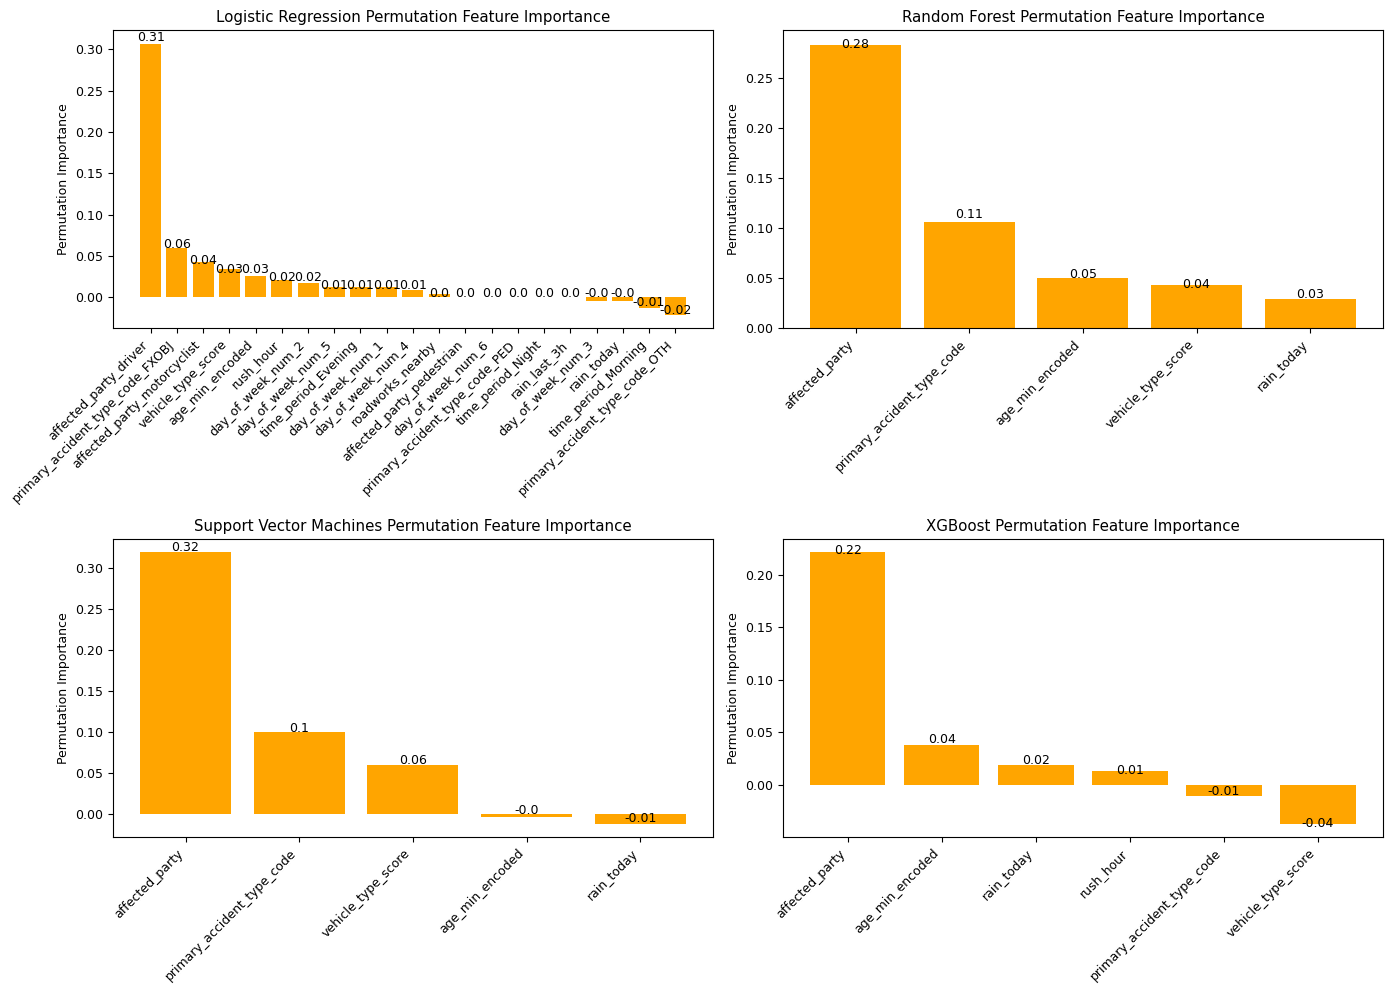

In [256]:
#permutation importance

def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2), round(y[i],2), ha='center')  # Aligning text at center

plt.rcParams.update({'font.size':9})

plt.figure(figsize=(14, 10))

# Plot 1: Logistic regression
plt.subplot(2, 2, 1)
plt.bar(LR_perm_import['Feature'], LR_perm_import['Importance'],color='orange')
add_labels(LR_perm_import['Feature'], LR_perm_import['Importance'])

#plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Logistic Regression Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Plot 2: Random Forest
plt.subplot(2, 2, 2)
plt.bar(RF_perm_import['Feature'], RF_perm_import['Permutation Importance'],color='orange')
add_labels(RF_perm_import['Feature'], RF_perm_import['Permutation Importance'])

#plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Random Forest Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Plot 3: SVM
plt.subplot(2, 2, 3)
plt.bar(SVM_perm_import['Feature'], SVM_perm_import['Permutation Importance'],color='orange')
add_labels(SVM_perm_import['Feature'], SVM_perm_import['Permutation Importance'])

#plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Support Vector Machines Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Plot 4: XGBoost
plt.subplot(2, 2, 4)
plt.bar(XGBoost_perm_import['Feature'], XGBoost_perm_import['Permutation Importance'],color='orange')
add_labels(XGBoost_perm_import['Feature'], XGBoost_perm_import['Permutation Importance'])
#plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('XGBoost Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


6. Statistical Significance Testing
---------------------------------------------------------------------

In this part, we are testing a null hypothesis that there are no statistically significant differences in classifying injury severity between the four models.
Below, we are comparing the prediction probabilities across all target classes. 

In [257]:
#np arrays into vectors
LR_y_pred_score_res = LR_y_pred_score.ravel()
RF_y_pred_score_res = RF_y_pred_score.ravel()
SVM_y_pred_score_res = SVM_y_pred_score.ravel()
XGBoost_y_pred_score_res = XGBoost_y_pred_score.ravel()


One-Way Analysis of Variance (ANOVA) is used to compare the means of three or more groups. 

f_statistic: The computed F-value, representing the ratio of variance between groups to variance within groups; a larger value suggests more significant differences.
p_value: The probability associated with the F-statistic; a low p-value (e.g., < 0.05) indicates the differences between group means are unlikely to be due to random chance. 

In [258]:
#using ANOVA to compare the means of the four predicted probabilities outputs for the three classes
from scipy import stats

# one-way ANOVA
f_statistic, p_value = stats.f_oneway(LR_y_pred_score_res, RF_y_pred_score_res, SVM_y_pred_score_res, XGBoost_y_pred_score_res)

print(f"Probability Scores - Logistic Regression Mean: {np.mean(LR_y_pred_score_res):.3f}")
print(f"Probability Scores - Random Forest Mean: {np.mean(RF_y_pred_score_res):.3f}")
print(f"Probability Scores - Support Vector Machine Mean: {np.mean(SVM_y_pred_score_res):.3f}")
print(f"Probability Scores - XGBoost Mean: {np.mean(XGBoost_y_pred_score_res):.3f}")
print(f"\nF-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05 #confidence interval
if p_value < alpha:
    print(f"\nReject the null hypothesis (p={p_value:.4f}). There is a significant difference in mean probability scores among the models.")
else:
    print(f"\nFail to reject the null hypothesis (p={p_value:.4f}). No significant difference found in mean probability scores among the models.")


Probability Scores - Logistic Regression Mean: 0.333
Probability Scores - Random Forest Mean: 0.333
Probability Scores - Support Vector Machine Mean: 0.333
Probability Scores - XGBoost Mean: 0.333

F-statistic: 0.0000
P-value: 1.0000

Fail to reject the null hypothesis (p=1.0000). No significant difference found in mean probability scores among the models.


In [259]:
#comparing probabilities per class
f_statistic, p_value 


for i in range(n_classes):

    LR_y_pred_class_res = LR_y_pred_score[:,i].ravel()
    RF_y_pred_class_res = RF_y_pred_score[:,i].ravel()
    SVM_y_pred_class_res = SVM_y_pred_score[:,i].ravel()
    XGBoost_y_pred_class_res = XGBoost_y_pred_score[:,i].ravel()
    
    f_statistic, p_value = stats.f_oneway(LR_y_pred_score_res, RF_y_pred_score_res, SVM_y_pred_score_res, XGBoost_y_pred_score_res)

    print(f"Probability Scores Class {i} - Logistic Regression Mean: {np.mean(LR_y_pred_class_res):.3f}")
    print(f"Probability Scores Class {i} - Random Forest Mean: {np.mean(RF_y_pred_class_res):.3f}")
    print(f"Probability Scores Class {i} - Support Vector Machine Mean: {np.mean(SVM_y_pred_class_res):.3f}")
    print(f"Probability Scores Class {i} - XGBoost Mean: {np.mean(XGBoost_y_pred_class_res):.3f}")
    print(f"\nF-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpretation
    alpha = 0.05 #confidence interval
    if p_value < alpha:
        print(f"\nReject the null hypothesis (p={p_value:.4f}). There is a significant difference in mean probability scores among the class {i}.")
    else:
        print(f"\nFail to reject the null hypothesis (p={p_value:.4f}). No significant difference found in mean probability scores among the class {i}.")
        print(f"\n")




Probability Scores Class 0 - Logistic Regression Mean: 0.334
Probability Scores Class 0 - Random Forest Mean: 0.336
Probability Scores Class 0 - Support Vector Machine Mean: 0.313
Probability Scores Class 0 - XGBoost Mean: 0.329

F-statistic: 0.0000
P-value: 1.0000

Fail to reject the null hypothesis (p=1.0000). No significant difference found in mean probability scores among the class 0.


Probability Scores Class 1 - Logistic Regression Mean: 0.484
Probability Scores Class 1 - Random Forest Mean: 0.414
Probability Scores Class 1 - Support Vector Machine Mean: 0.505
Probability Scores Class 1 - XGBoost Mean: 0.342

F-statistic: 0.0000
P-value: 1.0000

Fail to reject the null hypothesis (p=1.0000). No significant difference found in mean probability scores among the class 1.


Probability Scores Class 2 - Logistic Regression Mean: 0.182
Probability Scores Class 2 - Random Forest Mean: 0.250
Probability Scores Class 2 - Support Vector Machine Mean: 0.182
Probability Scores Class 2 - XGB

7. Model performance vs different commuter groups
--------------------------------------------------------

Checking how many true predictions were for different categories within the affected party category.

In [260]:
X_test = pd.read_csv('results/Xtest.csv')

df_eval = X_test

#subtracting predicted target labels from the correct labels in the test set. In the case of correct predictions, the difference is 0

df_eval['affected_party'] = df_eval['affected_party'].replace({0:'pedestrian',2:'motorcyclist',3:'driver'})


df_eval['LRpredictions'] = abs(LR_y_test['injury_severity'].sub(LR_y_pred['0']))
df_eval['LRpredictions'] = df_eval['LRpredictions'].replace({0:'TRUE',1:'FALSE',2:'FALSE'})
print('LR Predictions')
print(df_eval['LRpredictions'].value_counts())

df_eval['RFpredictions'] = abs(RF_y_test['injury_severity'].sub(RF_y_pred['0']))
df_eval['RFpredictions'] = df_eval['RFpredictions'].replace({0:'TRUE',1:'FALSE',2:'FALSE'})
print('RF Predictions')
print(df_eval['RFpredictions'].value_counts())

df_eval['SVMpredictions'] = abs(SVM_y_test['injury_severity'].sub(SVM_y_pred['0']))
df_eval['SVMpredictions'] = df_eval['RFpredictions'].replace({0:'TRUE',1:'FALSE',2:'FALSE'})
print('SVM Predictions')
print(df_eval['SVMpredictions'].value_counts())

df_eval['XGBoostpredictions'] = abs(XGBoost_y_test['injury_severity'].sub(XGBoost_y_pred['0']))
df_eval['XGBoostpredictions'] = df_eval['XGBoostpredictions'].replace({0:'TRUE',1:'FALSE',2:'FALSE'})
print('XGBoost Predictions')
print(df_eval['XGBoostpredictions'].value_counts())



LR Predictions
LRpredictions
TRUE     36
FALSE    11
Name: count, dtype: int64
RF Predictions
RFpredictions
TRUE     37
FALSE    10
Name: count, dtype: int64
SVM Predictions
SVMpredictions
TRUE     37
FALSE    10
Name: count, dtype: int64
XGBoost Predictions
XGBoostpredictions
TRUE     32
FALSE    15
Name: count, dtype: int64


<Figure size 1400x1000 with 0 Axes>

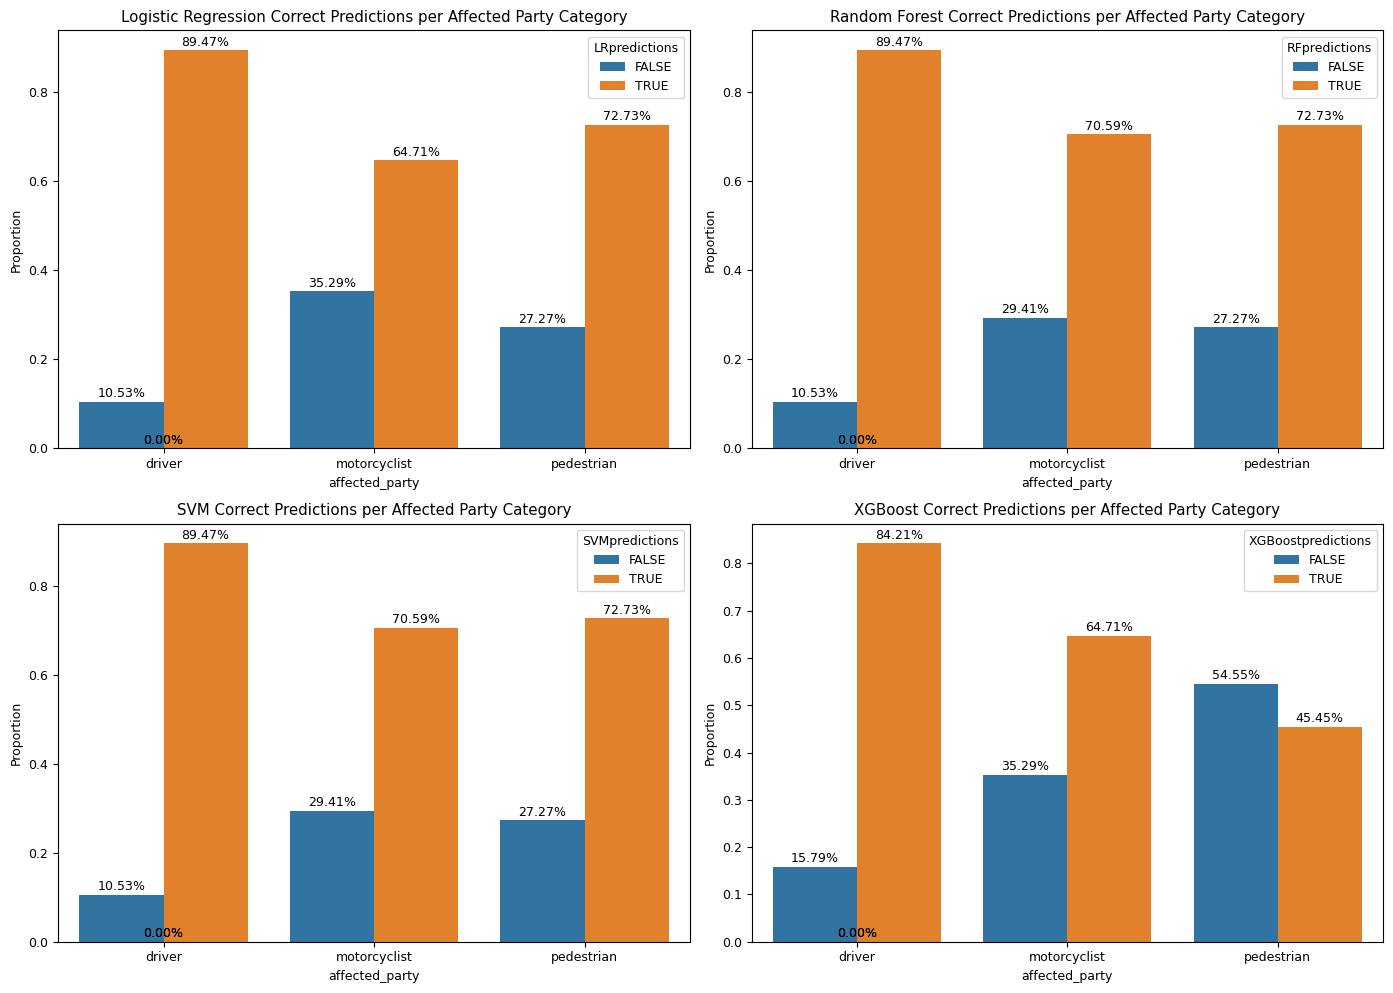

In [261]:
#Percentage of correct predictions for each commuter category within the affected party feature


plt.figure(figsize=(14, 10))
plt.rcParams.update({'font.size':9})

plt.figure(figsize=(14, 10))

#--------------------------------------------------------------------------------------
# Plot 1: Logistic regression 
plt.subplot(2, 2, 1)
grouped_data = df_eval.groupby(['affected_party', 'LRpredictions']).size().reset_index(name='counts')

# Calculate the total counts for each day
grouped_data['total'] = grouped_data.groupby('affected_party')['counts'].transform('sum')

# Calculate the proportion of each category
grouped_data['proportion'] = grouped_data['counts'] / grouped_data['total']

ax = sns.barplot(x="affected_party", y="proportion", hue="LRpredictions", data=grouped_data)
plt.ylabel('Proportion')
plt.title('Logistic Regression Correct Predictions per Affected Party Category')

# Add percentage labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.01, f'{height:.2%}', ha="center")
plt.tight_layout()
#------------------------------------------------------------------

# Plot 2: Random Forest
plt.subplot(2, 2, 2)
grouped_data = df_eval.groupby(['affected_party', 'RFpredictions']).size().reset_index(name='counts')

# Calculate the total counts for each day
grouped_data['total'] = grouped_data.groupby('affected_party')['counts'].transform('sum')

# Calculate the proportion of each category
grouped_data['proportion'] = grouped_data['counts'] / grouped_data['total']

ax = sns.barplot(x="affected_party", y="proportion", hue="RFpredictions", data=grouped_data)
plt.ylabel('Proportion')
plt.title('Random Forest Correct Predictions per Affected Party Category')

# Add percentage labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.01, f'{height:.2%}', ha="center")
plt.tight_layout()
#------------------------------------------------------------------------

# Plot 3: SVM
plt.subplot(2, 2, 3)
grouped_data = df_eval.groupby(['affected_party', 'SVMpredictions']).size().reset_index(name='counts')

# Calculate the total counts for each day
grouped_data['total'] = grouped_data.groupby('affected_party')['counts'].transform('sum')

# Calculate the proportion of each category
grouped_data['proportion'] = grouped_data['counts'] / grouped_data['total']

ax = sns.barplot(x="affected_party", y="proportion", hue="SVMpredictions", data=grouped_data)
plt.ylabel('Proportion')
plt.title('SVM Correct Predictions per Affected Party Category')

# Add percentage labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.01, f'{height:.2%}', ha="center")
plt.tight_layout()
#-----------------------------------------------------------------------------


# Plot 4: XGBoost
plt.subplot(2, 2, 4)
grouped_data = df_eval.groupby(['affected_party', 'XGBoostpredictions']).size().reset_index(name='counts')

# Calculate the total counts for each day
grouped_data['total'] = grouped_data.groupby('affected_party')['counts'].transform('sum')

# Calculate the proportion of each category
grouped_data['proportion'] = grouped_data['counts'] / grouped_data['total']

ax = sns.barplot(x="affected_party", y="proportion", hue="XGBoostpredictions", data=grouped_data)
plt.ylabel('Proportion')
plt.title('XGBoost Correct Predictions per Affected Party Category')

# Add percentage labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.01, f'{height:.2%}', ha="center")
plt.tight_layout()

Conclusion
------------------------------------------

Although the differences between prediction probabilities among the models could not be statistically confirmed, Support Vector Machines displayed higher performance metrics across the board. Random Forest comes close, but it is more computationally expensive, especially if applied to a data set with many more records and features.

B. Ethical Analysis (critical)
-----------------------------------------------------------------


Proxy Variables: Is Location a Suitable Proxy? Temporal biases?
-----------------------------------------------------------------------

1. Location can be one of the most significant parameters: road type could be a decisive feature to predict injury severity since the collisions on regional roads have a far more devastating impact than those on country roads or local roads. Also, road type and locality can benefit from historic data on the outcome of various types of accidents in this specific spot. Streets/roads can be flagged according to the frequency of major accidents in the past.

The model did not take road type into account. Since the majority of accidents mentioned in the source had seriously and grievously injured people, the location would not make a difference in our case. However, the location was used to extract speed cameras information. This parameter was not used in the model since the majority of the accidents occured in localities that did not have the cameras installed. The supplied sources listed accidents between December 2024 and mid-October 2025, and the most recently installed speed camera appears in 2023. A proper conclusion on the significance of this feature could only potentially be drawn if we were to scrape the sources from earlier than two years ago.

2. The sources contain information on accidents between the second week of December 2024 and mid-October 2025, thus the sources lack information on accidents in November.
In this project, we did not take months into consideration. From exploratory analysis, we found that 23% of all injuries occured on Sundays and public holidays. The lowest number of injuries was recorded on Tuesday (8.6%). Around a third of all injuries happened between 6am and noon.





## Fairness: Performance across geographic areas, conditions, groups


Performance accross geographic areas was not evaluated. However, there is no reason to think that this model is biased towards a specific geographic area.

When it comes to meteorological conditions, only rain was taken into account. Judging by feature importances, all models ranked it at near-zero, meaning this feature categories do not have an impact on classification outcome. 

The age of the (youngest) driver / motorcyclist does not have a significant impact on injury prediction. Its permutation importance is near-zero for Logistic Regression and Support Vector Machines, and slightly above zero for tree-based models like Random Forest and XGBoost. 

When it comes to commuter groups (pedestrians, cyclists, motorcyclists and drivers), all of the models better predicted injuries of drivers, compared to motorcyclists and pedestrians since this commuter groups dominated the data set (113 drivers of 232 records). Random Forest and SVM had over 70% of correct injury predictions for motorcyclists and pedestrians as well. Feature importance plots confirm the significance of commuter categories to all of the models. Logistic Regression rates driver as the most imporant category for class predictions. Gender was not considered in this project.

However, this model has been trained on data from local news articles and police press releases, which are biased towards major accidents. The bias in the source data as well as the small size of the dataset are the major limitations of this project. The bias in the source data is due to the nature of the source: the media and the police report on grievous injuries and fatalities. The minor accidents do not make it to the news articles and police reports. Thus, the extracted data primarily features serious and grievous injuries, and some fatalities. 

Police press-releases and news articles are not the most appropriate source of data for injury severity predictions. Had the models been trained on anonymised car or medical insurance claims data, they would have been more robust since these sources contain more training data on minor injuries across all commuter groups, as well as information on safety features of the vehicles.

Transparency: Model interpretability comparison
-------------------------------------------------------------

Logistic Regression is the most interpretable of all models since it rates not only the features, but categories within features. However, this model does not predict death.
Individual trees from tree-based models like Random Forest and XGBoost can be visualised and interpreted, but the whole ensemble method is a "black box". Support Vector Machines offer a moderate level of interpretability, acting as a bridge between simple, highly interpretable models (like Linear Regression) and "black-box" models like Random Forest and XGBoost.

Deployment risks: False positive/negative costs, policy impacts, feedback loops
---------------------------------------------------------------------------------

Although the model predictions often misclassify death as serious/grievous injury and vice versa (which is expected since 20% of grievous injuries from the final clean set were randomly reclassified as death), none of the models classified death as a minor injury, which would carry the highest cost for the affected party, insurance companies and policy makers. XGBoost misclassified only one case of serious/grievous injury as minor. Logistic regression classified zero instances of minor injuries as death, and other models had only one case of minor injuries classifed as death. Therefore, if the classification task is reformulated as binary (minor/major injuries), all of the models would perform well at distinguishing between non-injury/minor and serious/grievous/death target categories.

The models developed in this projects are simple, have a limited amount of training data and features. The models are suitable for predicting road accident outcomes for four commuter groups (pedestrian, cyclist, motorcyclist and driver), involved into four types of accidents (run-overs, collisions between vehicles, collisions with fixed objects and other types such as losing control and roll-overs), with consideration of larger vehicles involved into the accident. Based on the training data, the models associates drivers with minor injuries, which is a simplification. In order to better predict driver injury, the dataset needs to include vehicle safety features and road type.

No feedback loops were implemented in this project.


C. Recommendations
-----------------------------------------------------------------

Which technique(s) for this problem and why?
----------------------------------------------------------------------------------

Support Vector Machines model appears the best technique for the task, with Random Forest closest in metrics, although more computationally expensive. 
The advantage of Logistic Regression is its impretability, whereas XGBoost displayed the highest true positive rates for death category.

If the classification problem is formulated as binary (non-injury/minor injury vs serios/grievous injuries & death), Logistic Regression could be the best choice.
Random Forest could be the best model to apply to a larger dataset with many more features.  
Alternatively, three models could be used in conjunctions: Logistic Regression - for minor injury predictions, SVM - for serious/grievous injury predictions and XGBoost - for fatal predictions.

Real-world deployment considerations
-----------------------------------------------------

The models developed in this projects are simple, have a limited amount of training data and features. Police press-releases and news articles are not the most appropriate source of data for injury severity predictions. These sources are heavily biased towards serious injuries and fatal accidents, providing little insight into minor injuries across different commuter groups. Had the models been trained on anonymised car or medical insurance data, they would have been more robust since the sources would include more training data on minor injuries across all commuter groups, as well as information on safety features of the vehicles. Based on the training data, the models associates drivers with minor injuries, which is a simplification. In order to better predict driver injury, the dataset needs to include vehicle safety features and road type.